# Is demographics a factor in SAT Results in New York City?

The SAT is a test that high school students take in their last year and the score they obtained is used by colleges in their admition process.

In this project, we are going to analyze if there is any influence of demographics such as race, gender, safety and more in the SAT results, and if this is the case that would suggest that the test is unfair to some students. 

In order to do this analysis, we are going to use a series of datasets from 2011 acquired and made available by the New York City government. The datasets are:
* ap_2010.csv - Advanced Placement (AP) exam results for each high school. Available [here](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e).
* class_size.csv - Information on class size for each school. Available [here](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3).
* demographics.csv - Demographic information for each school. Available [here](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j).
* graduation.csv - The percentage of students who graduated, and other outcome information. Available [here](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a).
* hs_directory.csv - Directory of The New York City Public High Schools. Available [here](https://data.cityofnewyork.us/Education/2010-2011-NYC-High-School-Directory/6dx8-h7s4).
* sat_results.csv - SAT scores for each high school in New York City. Available [here](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4).
* survey_all.txt and survey_d75.txt - Surveys of parents, teachers, and students at each school. Available [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8).

## Data import
We need to import the multiple datasets, to do the further cleaning and combination of them into a single DataFrame.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import plotly.offline as py
import plotly.express as px
import seaborn as sns
py.init_notebook_mode(connected=True) 


In [2]:
# generation of a data dictonary that will contain the multiple pandas DataFrames from each dataset
data = {}
for f in os.listdir('schools'): # reading of each file in the 'schools' folder
    if f.endswith('.csv'):
        data[f.replace('.csv','')] = pd.read_csv(f'schools/{f}')




In [3]:
data

{'ap_2010':         DBN                                         SchoolName  \
 0    01M448                       UNIVERSITY NEIGHBORHOOD H.S.   
 1    01M450                             EAST SIDE COMMUNITY HS   
 2    01M515                                LOWER EASTSIDE PREP   
 3    01M539                     NEW EXPLORATIONS SCI,TECH,MATH   
 4    02M296              High School of Hospitality Management   
 ..      ...                                                ...   
 253  31R605                         STATEN ISLAND TECHNICAL HS   
 254  32K545                      EBC-HS FOR PUB SERVICE (BUSH)   
 255  32K552                          Academy of Urban Planning   
 256  32K554               All City Leadership Secondary School   
 257  32K556  Bushwick Leaders High School for Academic Exce...   
 
     AP Test Takers  Total Exams Taken Number of Exams with scores 3 4 or 5  
 0                39                49                                   10  
 1                19       

Some insights can be obtained by the display of the data dictionary:
* The DBN column is present in almost every dataset, except from the 'class_size' (we will generate it later). This column is the District Borough Number which is an identifier for each school and because it is present in every dataset, we will use it for the dataframe merging. 
* Some datasets like 'demographics' or 'graduation' have multiple rows for the same DBN, meaning that we will need to condensate these datasets prior the merging. 

Now, we will import the surveys datasets that are in a different format, as they are text files with Windows-1252 encoding. 

In [4]:
# import of the survey files and combination of them into a single pandas DataFrame
survey_all = pd.read_csv('schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
survey_d75 = pd.read_csv('schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')
surveys = pd.concat([survey_all, survey_d75], axis=0)

surveys

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,X352,The Vida Bogart School for All Children,1,Yes,0.0,District 75 Special Education,90.0,58,48,...,38.0,24.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,75X721,X721,P.S. X721 - Stephen McSweeney School,1,Yes,NaN,District 75 Special Education,84.0,90,48,...,1.0,1.0,9.0,21.0,31.0,15.0,9.0,5.0,5.0,2.0
53,75X723,X723,X723,1,Yes,NaN,District 75 Special Education,77.0,74,20,...,24.0,27.0,11.0,11.0,3.0,5.0,0.0,0.0,0.0,0.0
54,75X754,X754,J. M. Rapport School Career Development,1,Yes,NaN,District 75 Special Education,63.0,93,22,...,0.0,0.0,5.0,15.0,13.0,17.0,18.0,16.0,10.0,6.0


## Data Preparation
As mentioned before, the datasets need some preparation prior the merge into one dataframe. In this section we will do these preparations in several parts:

### Removing unnecessary columns in the surveys dataframe

First, we are going to remove the majority of the columns in the surveys DataFrame, as we just need the ones related to safety and the Distric Borough Number (DBN) to connect it with the other datasets. The selection of satefy columns was done by using the data dictionary that is available [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8).

In [5]:
# standardization of the DBN column in concordance with the other datasets.
surveys['DBN'] = surveys['dbn']

# list of DBN and safety related columns
surveys_field=[
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# selection of the columns in the surveys dataframe
surveys = surveys.loc[:,surveys_field]

# addition of the surveys dataset into the data dictionary
data['survey'] = surveys

### Standardization of the DBN column

By looking to the quick preview of the datasets in the data dictionary, it is shown that the 'hs_directory' dataset has the 'dbn' column in lowercase and the 'class size' dataset doesn't have one. 

In order to mantain a common standard in the DBN column, the DBN in the 'hs_directory' would be put in uppercase and in the 'class size' dataset it will be generated from the 'CSD' and 'SCHOOL CODE' columns. 

In [6]:
# changing the dbn column in the hs_directory dataframe to DBN 
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# definition of a padding function for the csd column
def pad_csd(val):
    x = str(val)
    if len(x) < 2:
        return x.zfill(2)
    else:
        return x
    
# generation of a DBN column in the class_size dataframe
data['class_size']['DBN'] = data['class_size']['CSD'].apply(pad_csd) + data['class_size']['SCHOOL CODE']
print(data['class_size']['DBN'].head(5))
 

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object


## Check type of values in datasets
Let's review the type of the values in the dataset to check if they are correct or need some modification. 


In [7]:
for key in data:
    print(key, data[key].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DBN                                   258 non-null    object
 1   SchoolName                            258 non-null    object
 2   AP Test Takers                        258 non-null    object
 3   Total Exams Taken                     258 non-null    object
 4   Number of Exams with scores 3 4 or 5  258 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB
ap_2010 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2 

There are some numeric values that in the import its type was wrongfully determined. This is the case of the last three columns in 'ap_2010', the SAT averages in the 'sat_results' and location in the 'hs_directory'. 

Also some important information can be derived by having these values in numeric, like the total average score of the SAT for 'sat_results' and the latitude and longitude for each school in the dataset from the 'hs_directory'.

First, we are going to convert to numeric the AP Test Takers, Total Exams Taken, Number of Exams with scores 3,4 or 5 columns.

In [8]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

Now, we are going to convert to numeric the SAT avg. scores in the 'sat_results' dataframe and with them, we are going to calculate the total SAT avg. score. 

In [9]:
# convertion to numeric
sat_scores = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']
data['sat_results']['sat_score'] = 0
for s in sat_scores:
    data['sat_results'][s] = pd.to_numeric(data['sat_results'][s], errors='coerce')

# calculation of the total sat score
data['sat_results']['sat_score'] = data['sat_results'][sat_scores[0]] + data['sat_results'][sat_scores[1]] + data['sat_results'][sat_scores[2]]
data['sat_results'].head(5)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


For the Location 1 column in the 'hs_directory', we are going to take a look in the format of the column.

In [10]:
print(data['hs_directory']['Location 1'].iloc[0])

883 Classon Avenue
Brooklyn, NY 11225
(40.67029890700047, -73.96164787599963)


To obtain the information of latitude and longitude that we will use in some mapping later on, we are going to remove the other information and create two columns for these two values. 

In [11]:
# extraction of latitude
pattern_lat = r'\((.+),'
data['hs_directory']['Latitude'] = data['hs_directory']['Location 1'].str.extract(pattern_lat)
# extraction of longitude
pattern_lon = r',(.+)\)'
data['hs_directory']['Longitude']= data['hs_directory']['Location 1'].str.extract(pattern_lon)

# convertion to numeric
data['hs_directory']['Latitude'] = pd.to_numeric(data['hs_directory']['Latitude'], errors='coerce')
data['hs_directory']['Longitude'] = pd.to_numeric(data['hs_directory']['Longitude'], errors='coerce')
data['hs_directory'].head(5)


,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,Latitude,Longitude
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


### Condense the data
Three of seven datasets need to be condensed, as they have multiple rows for the same DBN value and this will cause problems at the time of the merge. These datasets are:
* class_size
* demographics
* graduation

#### Class size

In [12]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In this dataset, there is information of all grades in the schools of New York City, but we are just interested in high school were the students take the SAT. So, we are going to filter this dataset by Grade just leaving high school. 

Also, there are different types of programs, but in this analysis we are interested in the general education program, so we are going to filter by this value too. 

In [13]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


In order to have a representative data of the classroom sizes and also having just one value for school, we are going to calculate the average classroom size for each school. 

In [14]:
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


#### Demographics

In [15]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


The 'demographics' dataset contains information from multiple years but we are just interested in the most recent one, that is 2011 - 2012.

In [16]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


#### Graduation

In [17]:
data["graduation"]

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5%,0,0%,0%,...,0,0%,0%,1,1.5%,100%,44.0,67.7%,20.0,30.8%
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1%,0,0%,0%,...,0,0%,0%,2,3.1%,100%,38.0,59.4%,22.0,34.4%
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8%,1,1.3%,33.3%,...,1,1.3%,33.3%,2,2.5%,66.7%,46.0,58.2%,28.0,35.4%
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7%,2,3.5%,50%,...,2,3.5%,50%,2,3.5%,50%,34.0,59.6%,17.0,29.8%


The 'graduation' dataset also contains multiple year information and it is separated into three categories (Male, Female and Total Cohort). 

We are just interested in the most recent year, that is 2006 for this dataset. And we will want all the information of people that graduated (Total Cohort), not separetad by gender. Therefore, a filter to obtain these values was applied to the dataset.

In [18]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


### Combine the datasets
In order to combine the datasets, firts the 'sat_results' dataset is defined as the pilar to the combination, as it contains the values more important for this analysis. 

In [19]:
combined = data['sat_results']

Then, the 'ap_2010' and 'graduation' datasets are merged to the 'sat results', by using a left joint, as we want to keep the rows that have an SAT result value. The joint is donde by using the DBN column. 

In [20]:
combined = combined.merge(data['ap_2010'], how='left', on='DBN')
combined = combined.merge(data['graduation'], how='left', on='DBN')

For last, the remaining datasets are merged with the initial combination, this by using an inner joint in order to mantain the sat results that also have information about the demographics and the surveys from teachers, students and parents. Again, the joint is done by using the DBN column.

In [21]:
com_list = ["class_size", "demographics", "survey", "hs_directory"]

for com in com_list:
    combined = combined.merge(data[com], how='inner', on='DBN')

### Replacing null values
Now, we have our final combined dataset, but to finish the data cleaning, we need to replace the null values present in it. In order to do it, we are going to fill the null values with the mean of each column and the remaining ones with 0. 

In [22]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [23]:
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Latitude,Longitude
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0.0,0.0,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0.0,0.0,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,32K545,EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK,88,384.0,409.0,361.0,1154.0,EBC-HS FOR PUB SERVICE (BUSH),47.000000,64.000000,...,Then to New York City residents,0,0,0,0.0,0.0,0.0,"1155 Dekalb Avenue\nBrooklyn, NY 11221\n(40.69...",40.694482,-73.929154
359,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,353.0,334.0,1035.0,0,129.028846,197.038462,...,Then to District 32 students or residents,Then to Brooklyn students or residents,Then to New York City residents,0,0.0,0.0,0.0,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",40.696962,-73.910816
360,32K552,ACADEMY OF URBAN PLANNING,67,342.0,364.0,354.0,1060.0,Academy of Urban Planning,76.000000,100.000000,...,Then to New York City residents,0,0,0,0.0,0.0,0.0,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",40.696962,-73.910816
361,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,All City Leadership Secondary School,7.000000,8.000000,...,Then to New York City residents who attend an ...,"Then to Districts 24, 30 and 32 students or re...",Then to Brooklyn students or residents,Then to New York City residents,0.0,0.0,0.0,"321 Palmetto Street\nBrooklyn, NY 11237\n(40.6...",40.697408,-73.913153


## Data analysis
With the dataset cleaned, we are ready to analyze if demographics affects the results of the SAT and if it is unfair to certain people. 

We are going to study four factors:
* Safety
* Race
* Gender
* AP scores

But first, we are going to calculate the correlations of the values in the dataset with the SAT scores. 

### Correlations

In [24]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations.sort_values(ascending=False)[:25])

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

By looking to the table above:
* There is a strong positive correlation between white and asian percentages in schools with SAT results.
* There is a strong positive correlation between AP Test Takers and SAT scores. 
* There is a positive correlation between the number of students taking surveys and the perception of safety with SAT results. 

To dig more into the correlations, now we are going to plot these correlation values with respect to the survey results.

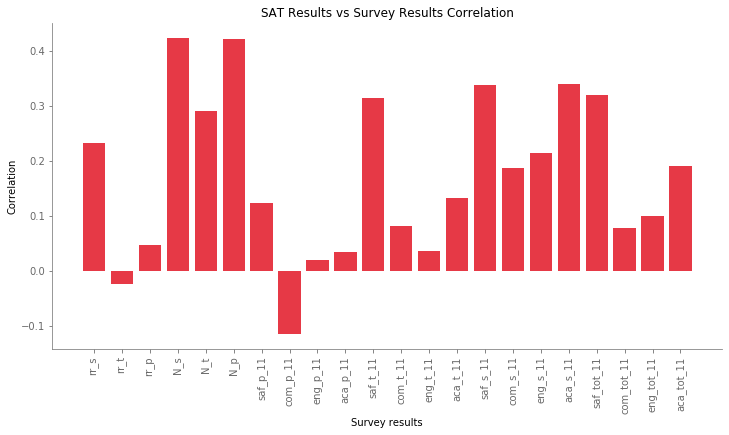

In [25]:
surveys_field.remove('DBN')
corr_plot = correlations[surveys_field]
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(corr_plot.index, corr_plot, color='#e63946')
ax.set_xticklabels(corr_plot.index, rotation=90)
ax.set_xlabel('Survey results')
ax.set_ylabel('Correlation')
ax.set_title('SAT Results vs Survey Results Correlation')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(axis='both', colors='dimgrey')
plt.show()


Some insights can be derived from the bar chart exposed above:

* There is a good correlation between the student response rate (rr_s) of the Surveys and the SAT Scores, this can be attributed that studes that are more responsible and filled the surveys are better in school.

* There is a strong correlation in the SAT scores in terms of perception of safety (saf_s_11, saf_t_11, saf_tot_11), this can be because a student that feels more safe in school can focused more in the education. 

* There is a strong correlation between the number of students and parents respondants (N_s & N_p) of the Surveys and the SAT Scores, this is a known trend that as higher the number of students, higher the SAT Scores. 

### Safety and SAT Scores
Now, we are going to analyze the correlation between the perception of safety of the students and their SAT results. 

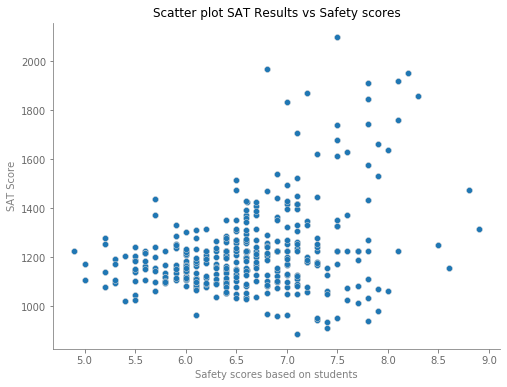

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter( combined['saf_s_11'],combined['sat_score'],c=f'tab:blue', linewidths=.5, edgecolors='lightgray')
ax.set_xlabel('Safety scores based on students', color='grey')
ax.set_ylabel('SAT Score', color='grey')
ax.set_title('Scatter plot SAT Results vs Safety scores')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(axis='both', colors='dimgrey')
plt.show()

By analyzing the plot of Safety vs SAT results, it can be observed that there is some correlation between them. There are some schools with high safety scores and high SAT results but there are some with high safety and low SAT. 

It also be interesting to see how the safety perception changes in the different districts of New York City. Let's create a map of this.

In [27]:
# add a district column for mapping
combined["school_dist"] = combined["DBN"].apply(lambda a: a[0:2])
# calculate statistics per district
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)
districts


,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,Latitude,Longitude
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251
5,06,382.011940,400.565672,382.066269,1164.643881,108.711538,159.715385,105.425000,180.848387,6.0,...,12.0,12.0,10036.200000,628.900000,1.300000,0.0,0.0,0.0,40.848970,-73.932502
6,07,376.461538,380.461538,371.923077,1128.846154,73.703402,112.476331,105.276923,105.605459,7.0,...,12.0,12.0,10452.692308,465.846154,1.461538,0.0,0.0,0.0,40.816815,-73.919971
7,08,386.214383,395.542741,377.908005,1159.665129,118.379371,168.020979,144.731818,215.510264,8.0,...,12.0,12.0,10467.000000,547.636364,1.272727,0.0,0.0,0.0,40.823803,-73.866087
8,09,373.755970,383.582836,374.633134,1131.971940,71.411538,104.265385,98.470000,113.330645,9.0,...,12.0,12.0,10456.100000,449.700000,1.150000,0.0,0.0,0.0,40.836349,-73.906240
9,10,403.363636,418.000000,400.863636,1222.227273,132.231206,226.914336,191.618182,161.318182,10.0,...,12.0,12.0,10463.181818,757.863636,1.500000,0.0,0.0,0.0,40.870345,-73.898360


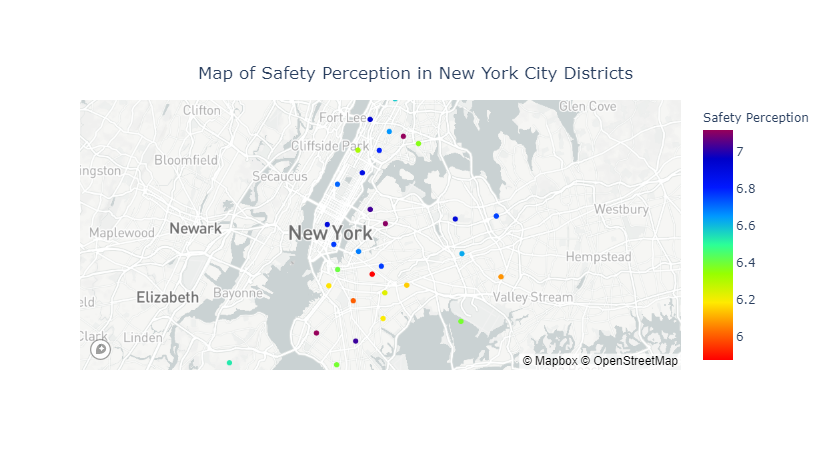

In [28]:
# now let's plot the map of safety using plotly
px.set_mapbox_access_token('pk.eyJ1IjoicGFsYXZpY2kiLCJhIjoiY2tlajUwa2Y2MDF1ZjJ6bzg0Y3Ryb2Z3bSJ9.d1_EzLVQiv1ap5XuOxdhsg')

fig = px.scatter_mapbox(districts, lat="Latitude", lon="Longitude", color="saf_s_11", labels={'saf_s_11':'Safety Perception'},
                  color_continuous_scale='Rainbow_r', zoom=9, hover_data={'Latitude':False, 'Longitude':False, 'saf_s_11':True},
                       title='Map of Safety Perception in New York City Districts')
fig.update_layout(
    title={
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
py.iplot(fig, filename='map')

By looking the map above, it is clear that there is a different perception of safety through New York City, showing that:
* Manhattan and Queens have the highest perception of safety.
* Brooklyn and Bronx have a lower perception of satery, but Brooklyn is divided, the northern part has a low safety perception but the southern part has a high safety perception. 


## SAT Scores and Race

In this section, an analysis will be realized to determine if there is a relationship between the race of a student and its results of the SAT. 

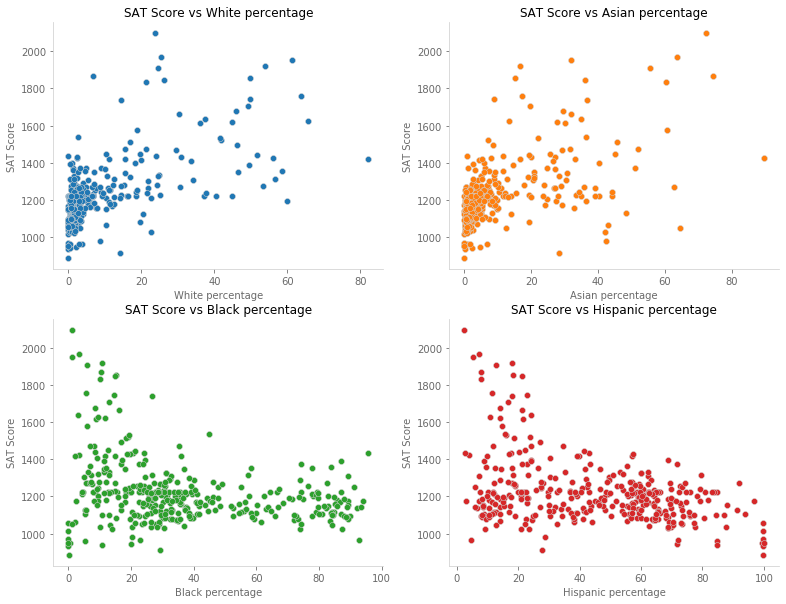

In [29]:
arr = np.array(['white_per','asian_per', 'black_per', 'hispanic_per']).reshape(2,2)
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(13,10),facecolor='white')
colors = ['blue','orange','green','red']
race = ['White', 'Asian', 'Black', 'Hispanic']
con = -1
for r in np.arange(0,2):
    for c in np.arange(0,2):
        con += 1
        ax[r,c].scatter(combined[arr[r,c]], combined['sat_score'],c=f'tab:{colors[con]}', linewidths=.5, edgecolors='lightgray')
        ax[r,c].set_title(f'SAT Score vs {race[con]} percentage')
        ax[r,c].spines["right"].set_visible(False) 
        ax[r,c].spines["top"].set_visible(False)
        ax[r,c].spines['left'].set_color('lightgrey')
        ax[r,c].spines['bottom'].set_color('lightgrey')
        ax[r,c].set_xlabel(f'{race[con]} percentage', c='dimgrey')
        ax[r,c].set_ylabel('SAT Score', c='dimgrey')
        ax[r,c].tick_params(axis='both', colors='dimgrey')
        
plt.show()

As seen in the plot above, there are some correlations between the race and SAT Score:
* There is a positive correlation between the Asian and White percentage and the SAT Score. 
* There is a negative correlations between the Black Percentage and Hispanic Percentage with the SAT Score, this maybe due to the lack of fundings for the schools where most african americans and hispanic students attend. 

Let's focus on the Hispanic percentage correlation with the SAT Score, specifically with two cases, one with schools that have an hispanic percentage higher than 95% and the second one with schools with a SAT score higher than 1800 and an hispanic percentage lower than 10.

#### Firsr case

In [30]:
high_hispanic = combined.loc[combined['hispanic_per'] > 95, ['SCHOOL NAME', 'sat_score']]
high_hispanic.sort_values(by='sat_score',axis=0, ascending=False)

,SCHOOL NAME,sat_score
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,1174.0
44,MANHATTAN BRIDGES HIGH SCHOOL,1058.0
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,1014.0
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,970.0
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,951.0
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,951.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,934.0
253,MULTICULTURAL HIGH SCHOOL,887.0


One reason for the lower SAT Scores and the high hispanic percentage is because these students are recently inmigrants and they are attending schools specialiced in new English Learners. As the students are learning English and also taking their main courses is understandble that their SAT Scores are low.  

#### Second case

In [31]:
low_hispanic = combined.loc[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800), ['SCHOOL NAME', 'sat_score']]
low_hispanic.sort_values(by='sat_score',axis=0, ascending=False)

,SCHOOL NAME,sat_score
37,STUYVESANT HIGH SCHOOL,2096.0
151,BRONX HIGH SCHOOL OF SCIENCE,1969.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,1868.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,1833.0


These schools have the higher values of SAT Scores and the reason for that is their specialization in science and technology and also the high funding that the schools receive. To entry to this schools an exam is needed and kids through all New York apply to these, and this can be the reason for the low percentage of hispanics; new inmigrants are not going to be able to do the exam if they still need to learn the language and also if the school is far from their neighborhood there are reasons to avoid this schools and go for the ones closer to where they live. 

### Gender vs SAT Score

Now, lets analyze if there is a correlation between the gender of the students and SAT Scores, and try to determine if the test is biased towards some gender. 

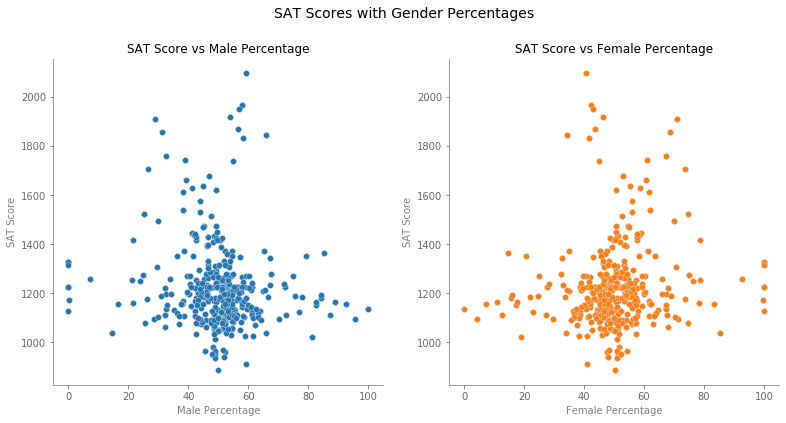

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
ax[0].scatter(combined['male_per'], combined['sat_score'],c=f'tab:blue', linewidths=.5, edgecolors='lightgray')
ax[1].scatter(combined['female_per'], combined['sat_score'],c=f'tab:orange', linewidths=.5, edgecolors='lightgray')
ax[0].set_ylabel('SAT Score', color='grey')
ax[1].set_ylabel('SAT Score', color='grey')
ax[0].set_xlabel('Male Percentage', color='grey')
ax[1].set_xlabel('Female Percentage', color='grey')
ax[0].set_title('SAT Score vs Male Percentage')
ax[1].set_title('SAT Score vs Female Percentage')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_color('grey')
ax[0].spines['bottom'].set_color('grey')
ax[0].tick_params(axis='both', colors='dimgrey')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_color('grey')
ax[1].spines['bottom'].set_color('grey')
ax[1].tick_params(axis='both', colors='dimgrey')
plt.suptitle('SAT Scores with Gender Percentages', fontsize=14, y=1)
plt.show()

As seen in the plot above, there is no correlation between the gender and the SAT results. 

But, we can investigate more about the groups where the percentage of male or female is high and the SAT Score is also high, and see if there is a reason for this.

#### High Female percentage

In [33]:
high_female = combined.loc[(combined['female_per'] > 50) & (combined['sat_score'] > 1700), ['SCHOOL NAME', 'sat_score']]
high_female

,SCHOOL NAME,sat_score
5,BARD HIGH SCHOOL EARLY COLLEGE,1856.0
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0
60,BEACON HIGH SCHOOL,1744.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0
302,TOWNSEND HARRIS HIGH SCHOOL,1910.0


By doing a quick search on Google, this schools tend to be focused on arts and have high academic standards to get in.  

#### High Male percentage

In [34]:
high_male = combined.loc[(combined['male_per'] > 50) & (combined['sat_score'] > 1700), ['SCHOOL NAME', 'sat_score']]
high_male

,SCHOOL NAME,sat_score
37,STUYVESANT HIGH SCHOOL,2096.0
79,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",1847.0
151,BRONX HIGH SCHOOL OF SCIENCE,1969.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,1920.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,1833.0
198,"BROOKLYN LATIN SCHOOL, THE",1740.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953.0


In the case of schools with more males and high SAT Scores, the schools tend to be more focused in science and technology.


## SAT Scores and Advanced Placement
For the final part of this project, an analysis of the relationship of the SAT scores and the number of students that take advanced placement exams is going to be executed.

But, as total enrollment is highly correlated to SAT Scores, we need to obtain the percentage of students that takes the AP Test per school to unbias our analysis. 

In [35]:
# Ap takers percentage
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']

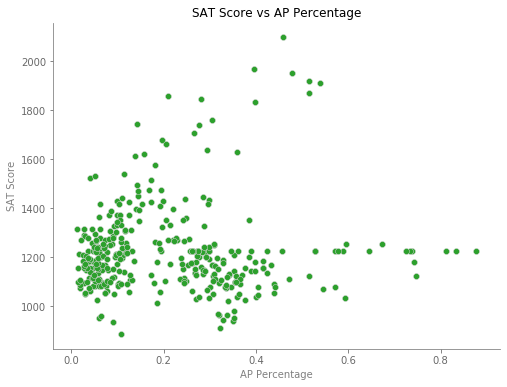

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(combined['ap_per'], combined['sat_score'],c=f'tab:green', linewidths=.5, edgecolors='lightgray')
ax.set_ylabel('SAT Score', color='grey')
ax.set_xlabel('AP Percentage', color='grey')
ax.set_title('SAT Score vs AP Percentage')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(axis='both', colors='dimgrey')

plt.show()

By just thinking about it, it makes sense that as more students take AP exams in a school, the SAT Score should be higher, as the students are better prepare and looking for challenges. But, by looking the data, even though there is some positive correlation, this is not a strong one. 

## Conclusion
By the four factors that we study in this project, we can conclude that the SAT is not unfair to students in terms of Safety, Gender and Ap takers. This because for these three factos there is no correlation with SAT scores. 

The only factor where there is some correlation with SAT scores is with race, as we saw that schools with higher percentage of white and asian students have positive correlation with SAT Scores and in the other hand, schools with higher percentage of black and hispanic students have negative correlation with SAT Scores. 

This can be due a lack of funding for schools in neighborhood where the majority of their population is black or hispanic. And also due the problems with immigrants than doesn's speak the language when they arrive to the US.